In [1]:
import cv2
import dlib
import numpy as np
from keras.preprocessing import image
from sklearn.metrics import euclidean_distances
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
model = load_model("model_landmark.h5")

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

In [103]:
labels_class = ['Yawn', 'Yawn',
                'Yawn', 'Yawn', 'Yawn', 'Yawn']

In [106]:
test_img = cv2.imread('./test/test8.jpg')

In [107]:
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [108]:
rects = detector(gray_img, 1)
print(rects)
for rect in rects:
        X = []
        shape = predictor(gray_img, rects[0])

        shape_np = np.zeros((68, 2), dtype="int")

        for i in range(0, 68):
            shape_np[i] = (shape.part(i).x, shape.part(i).y)
        shape = shape_np

        eucl_dist = euclidean_distances(shape, shape)
        X.append(eucl_dist)

        X = np.array(X)

        X_train = tf.expand_dims(X, axis=-1)

        predictions = model.predict(X_train)
        print(predictions)

        # Display the landmarks
        for i, (x, y) in enumerate(shape):
            # Draw the circle to mark the keypoint
            cv2.circle(test_img, (x, y), 1, (0, 0, 0), -1)

        cv2.putText(test_img, labels_class[np.argmax(predictions)] + " " + str(round(predictions[0][np.argmax(
            predictions)] * 100, 2)), (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        print("Predicted state: ", labels_class[np.argmax(predictions)])

        x = rect.left()
        y = rect.top()
        w = rect.right() - x
        h = rect.bottom() - y

        if (labels_class[np.argmax(predictions)] == "confused" or labels_class[np.argmax(predictions)] == "Engaged" or labels_class[np.argmax(predictions)] == "frustrated"):

            # draw box over face
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        else:

            # draw box over face
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

rectangles[[(230, 112) (498, 379)]]
1/1 [==============================] - 0s 74ms/step
[[1.1269042e-02 2.2907660e-05 2.6159661e-04 8.8066906e-01 4.7781650e-05
  1.0772965e-01]]
Predicted state:  Yawn


Text(0.5, 0, 'Predicted state: Yawn')

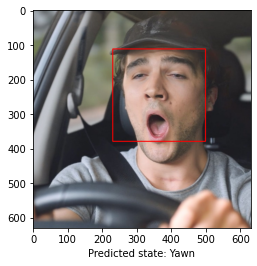

In [109]:
plt.imshow(img)
plt.xlabel("Predicted state: " + labels_class[np.argmax(predictions)])